# ロジスティック回帰
名前に反して分類手法の一つであり、人気手法の一つ

### 長所
* 出力が0〜1の確率で表されるため、天気予報などの「どのくらいの確率で現象Aが起こるか」を知りたいタスクで便利
* シンプルで解釈性にも優れる

### 短所
* ロジスティック回帰は与えられた訓練データから、パラメータの条件付き尤度最大化を行っているため、外れ値に影響されやすい
* 他クラスの場合は一対他で比較する必要がある

# サポートベクタマシン（SVM）
人気手法の一つであり、ディープラーニングが出てくるまでは無双していた
### 長所
* 比較的実装が容易であり、軽量
* データが線形分離不可能な場合（XORなど）で、非線形分離したい時に使う **カーネル法** と相性が良い
* 訓練時にSVMにとって興味があるのが「サポートベクタ（決定境界付近のデータ）」のみであるので、外れ値に強い

### 短所
* パラメータチューニングが必要

#### 補足：カーネル法について
非線形な射影関数を用いて、非線形分離を行うことが可能である。
$\phi(x)$をデータ$x$の射影とすると、訓練時に解く式に登場する$x$を$\phi(x)$で置き換えるだけで良い。
しかし、SVMは最適化する際に$\phi(x)$の内積を計算する必要があるが、陽に$\phi(x)$を扱うと計算が大変である。
よって以下のカーネル関数を代わりに計算する。
$$k(x, x') = \phi(x)^T \phi(x')$$

よく使われるカーネル関数はガウスカーネルと呼ばれる無限次元の基底を持つ射影関数である。式を下に示す。

$${k(x, x') = exp(-\frac {||x - x'||^2} {2\sigma^2} )}$$

実際には定数項をまとめて下のように簡略化される

$${k(x, x') = exp(-\gamma {||x - x'||^2} )}$$

カーネルは、大雑把に言うと「2サンプル間の類似度」を表している。

実際にカーネルSVMを実行してみる。

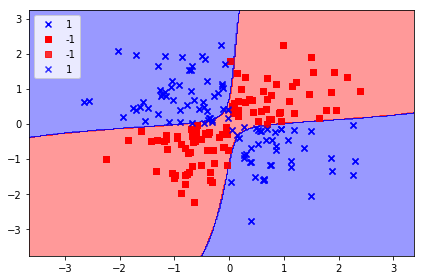

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

plt.xlim([-3, 3])
plt.ylim([-3, 3])

# 'rbf' はガウスカーネルのこと。線形分離したいときは'linear'
# gamma：大きいほど複雑な決定境界になる C：大きいほどハードマージン
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)

svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## ロジスティック回帰とSVMの比較
|ロジスティック回帰|SVM|
|---|---|
|<img src="http://imgur.com/oezyi2V.jpg", height=300px>|<img src="http://imgur.com/zelC6nJ.jpg", height=300px>|

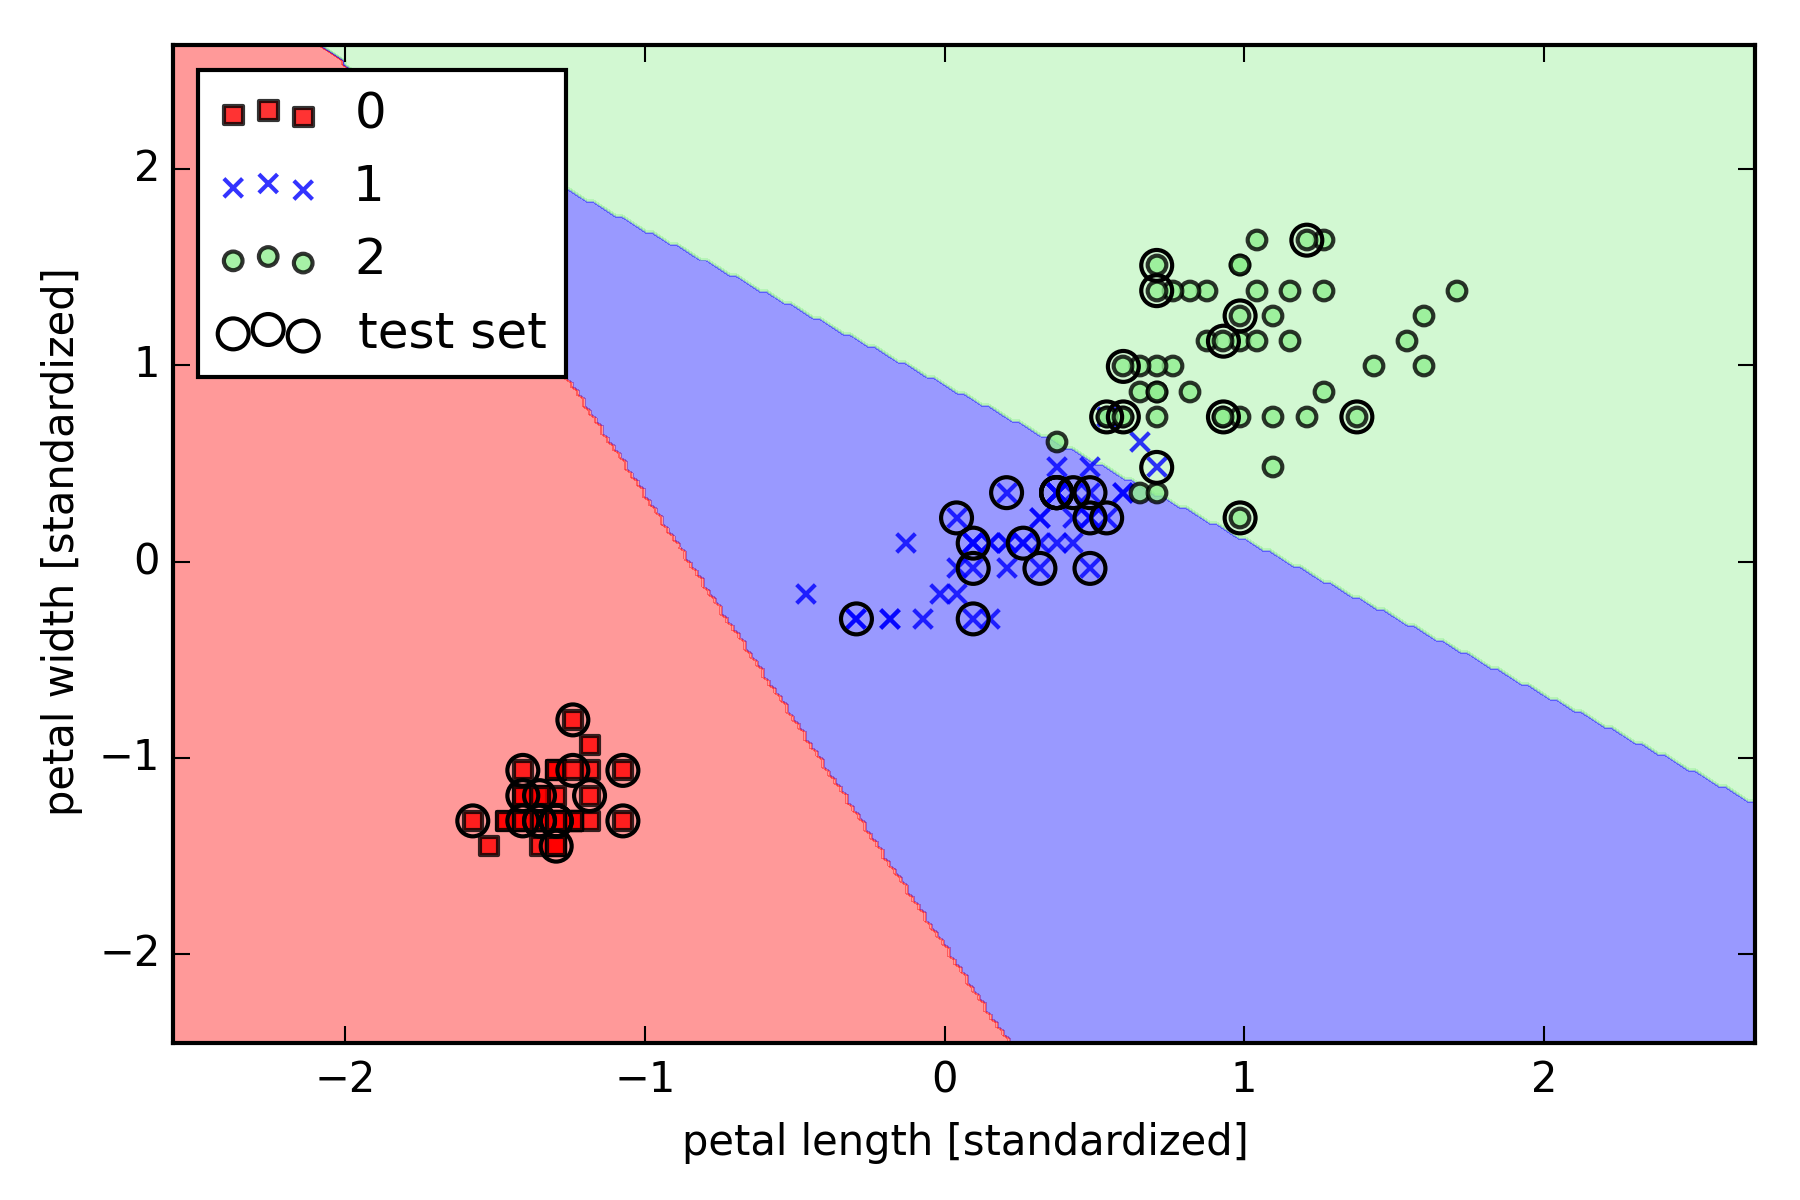

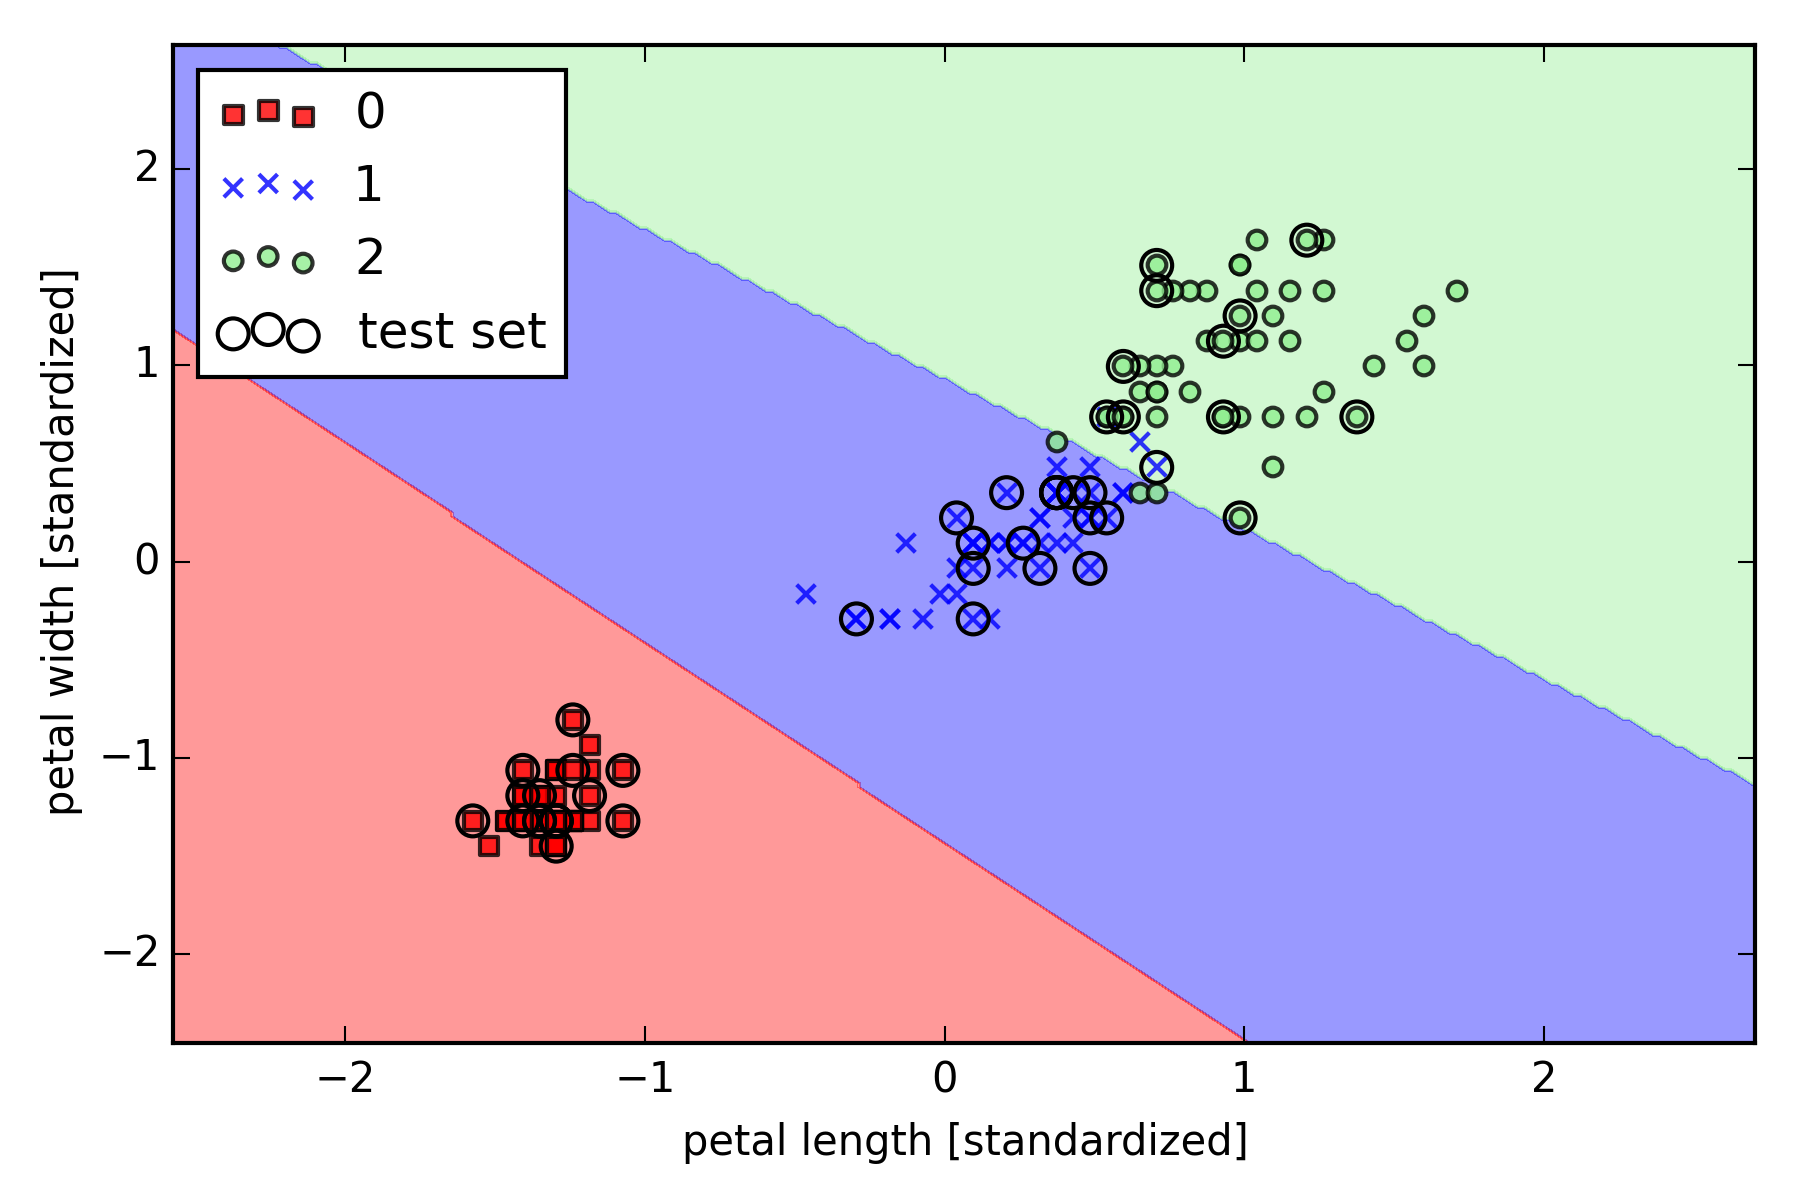

In [3]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='img1'></td><td><img src='img2'></td></tr></table>"))
x = Image(filename='images/03_05.png', width=200)
y = Image(filename='images/03_09.png', width=200)
display(x, y)

# 決定木
ジニ係数（ジニ不純度）：データの混ざり具合

### 長所
* 特徴量のスケーリングが必要ない
* モデルの解釈が容易（どの特徴量がどのように影響を及ぼしているか分かりやすい）

### 短所
* 過学習しやすい。（しかし、低バイアス高バリアンスの性質を活かしたアンサンブル学習器の「ランダムフォレスト」がとても強力）

---
### その他コード

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [6]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')
